In [ ]:
!pip install tensorflow tensorflow_hub numpy librosa scikit-learn

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import librosa

yamnet_model=hub.load('https://tfhub.dev/google/yamnet/1')

print("Model loaded Sucessfully")

Model loaded Sucessfully


In [4]:
# YAMNet expects 16 kHz mono audio
def extract_yamnet_embedding(file_path):
    # Load and resample
    waveform, sr = librosa.load(file_path, sr=16000)
    # Convert to float32 numpy array
    waveform = waveform.astype(np.float32)

    # Run YAMNet
    scores, embeddings, spectrogram = yamnet_model(waveform)


    embedding_mean = tf.reduce_mean(embeddings, axis=0).numpy()

    return embedding_mean


In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohit678687687","key":"0de9b3de1a965e216df04267592b0980"}'}

In [6]:
import os
import shutil
#making the keggle directory
os.makedirs("/root/.kaggle",exist_ok=True)
shutil.move("kaggle.json","/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 0o600)


In [7]:
!pip install -q kaggle

In [8]:
!kaggle datasets download -d soumendraprasad/sound-of-114-species-of-birds-till-2022 -p /content/
!unzip -q "/content/sound-of-114-species-of-birds-till-2022.zip" -d /content/birds_114

Dataset URL: https://www.kaggle.com/datasets/soumendraprasad/sound-of-114-species-of-birds-till-2022
License(s): CC0-1.0
 99% 2.04G/2.06G [00:27<00:00, 244MB/s]
100% 2.06G/2.06G [00:27<00:00, 81.2MB/s]


In [9]:
!find /content/birds_114 -type f | head -n 10

/content/birds_114/Voice of Birds/Voice of Birds/Red-billed Brushturkey_sound/Red-billed Brushturkey2.mp3
/content/birds_114/Voice of Birds/Voice of Birds/Red-billed Brushturkey_sound/Red-billed Brushturkey4.mp3
/content/birds_114/Voice of Birds/Voice of Birds/Red-billed Brushturkey_sound/Red-billed Brushturkey5.mp3
/content/birds_114/Voice of Birds/Voice of Birds/Red-billed Brushturkey_sound/Red-billed Brushturkey3.mp3
/content/birds_114/Voice of Birds/Voice of Birds/Red-billed Brushturkey_sound/Red-billed Brushturkey6.mp3
/content/birds_114/Voice of Birds/Voice of Birds/Red-billed Brushturkey_sound/Red-billed Brushturkey7.mp3
/content/birds_114/Voice of Birds/Voice of Birds/Maleo_sound/Maleo8.mp3
/content/birds_114/Voice of Birds/Voice of Birds/Maleo_sound/Maleo2.mp3
/content/birds_114/Voice of Birds/Voice of Birds/Maleo_sound/Maleo4.mp3
/content/birds_114/Voice of Birds/Voice of Birds/Maleo_sound/Maleo6.mp3


In [10]:
# converting mp3 to wav file
from pydub import AudioSegment
import os

src = "/content/birds_114"
dst = "/content/birds_114_wav"
os.makedirs(dst, exist_ok=True)

for root, _, files in os.walk(src):
    for f in files:
        if not f.lower().endswith(".mp3"):
            continue
        mp3 = os.path.join(root, f)
        wav = os.path.join(dst, os.path.splitext(f)[0] + ".wav")
        try:
            AudioSegment.from_file(mp3).export(wav, format="wav")
        except Exception as e:
            print(f" SKIPPING corrupt file: {f}")


In [11]:
# Quick check
!find /content/birds_114_wav -type f -name "*.wav" | head -n 10

/content/birds_114_wav/Collared Brushturkey11.wav
/content/birds_114_wav/Little Tinamou14.wav
/content/birds_114_wav/Cinereous Tinamou15.wav
/content/birds_114_wav/Band-tailed Guan30.wav
/content/birds_114_wav/Speckled Chachalaca26.wav
/content/birds_114_wav/Berlepschs Tinamou8.wav
/content/birds_114_wav/Collared Brushturkey16.wav
/content/birds_114_wav/East Brazilian Chachalaca20.wav
/content/birds_114_wav/Black-capped Tinamou24.wav
/content/birds_114_wav/Bartletts Tinamou25.wav


In [12]:
import glob
import os
from tqdm import tqdm

# Path to your audio dataset (adjust if needed)
dataset_path = "/content/birds_114/Voice of Birds/Voice of Birds"

# Recursively find all .mp3 files
audio_files = glob.glob(os.path.join(dataset_path, "**/*.mp3"), recursive=True)

# Sanity check
print(f"Found {len(audio_files)} audio files.")

# Lists to store data
X = []
y = []

# Loop through all files
for file_path in tqdm(audio_files, desc="Extracting embeddings"):
    try:
        embedding = extract_yamnet_embedding(file_path)
        X.append(embedding)
        # Label = parent folder name
        label = os.path.basename(os.path.dirname(file_path))
        y.append(label)
    except Exception as e:
        print(f"⚠️ Skipped {file_path}: {e}")

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print("✅ Embeddings extraction completed.")
print(f"Embeddings shape: {X.shape}")
print(f"Number of labels: {len(np.unique(y))}")


Found 2161 audio files.


Extracting embeddings:   1%|          | 18/2161 [00:18<18:56,  1.89it/s]/tmp/ipython-input-4-2273081494.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform, sr = librosa.load(file_path, sr=16000)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Extracting embeddings:  27%|██▋       | 583/2161 [02:40<02:22, 11.09it/s]/tmp/ipython-input-4-2273081494.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform, sr = librosa.load(file_path, sr=16000)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Extracting embeddings

✅ Embeddings extraction completed.
Embeddings shape: (2161, 1024)
Number of labels: 114


In [14]:
import numpy as np

# Count samples per class
labels, counts = np.unique(y, return_counts=True)

# Classes with at least 2 samples
valid_labels = labels[counts >= 2]
print(f"✅ Keeping {len(valid_labels)} classes out of {len(labels)} total.")

# Create mask to keep only those samples
mask = np.isin(y, valid_labels)
X_filtered = X[mask]
y_filtered = np.array(y)[mask]

# Encode labels again
le = LabelEncoder()
y_encoded = le.fit_transform(y_filtered)

# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("✅ Data prepared successfully.")
print(f"Train samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Classes remaining: {len(np.unique(y_train))}")


✅ Keeping 110 classes out of 114 total.
✅ Data prepared successfully.
Train samples: 1725
Test samples: 432
Classes remaining: 110


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot
y_train_cat = to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_test_cat = to_categorical(y_test, num_classes=len(np.unique(y_train)))

# Model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(1024,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile with AdamW optimizer
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Train
history = model.fit(
    X_train,
    y_train_cat,
    epochs=150,          # Long training
    batch_size=32,
    validation_data=(X_test, y_test_cat),
    callbacks=[early_stop, reduce_lr]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.0480 - loss: 4.9589 - val_accuracy: 0.2037 - val_loss: 4.2797 - learning_rate: 0.0010
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2693 - loss: 3.2041 - val_accuracy: 0.2083 - val_loss: 3.8408 - learning_rate: 0.0010
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3924 - loss: 2.6126 - val_accuracy: 0.2269 - val_loss: 3.4722 - learning_rate: 0.0010
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4990 - loss: 2.1165 - val_accuracy: 0.3611 - val_loss: 3.1064 - learning_rate: 0.0010
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5152 - loss: 1.9093 - val_accuracy: 0.4282 - val_loss: 2.7031 - learning_rate: 0.0010
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5829 - loss: 1.6935 - val_accuracy: 0.4699 - val_loss: 2.4170 - learning_rate: 0.0010
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6258 - loss: 1.4958 - val_a

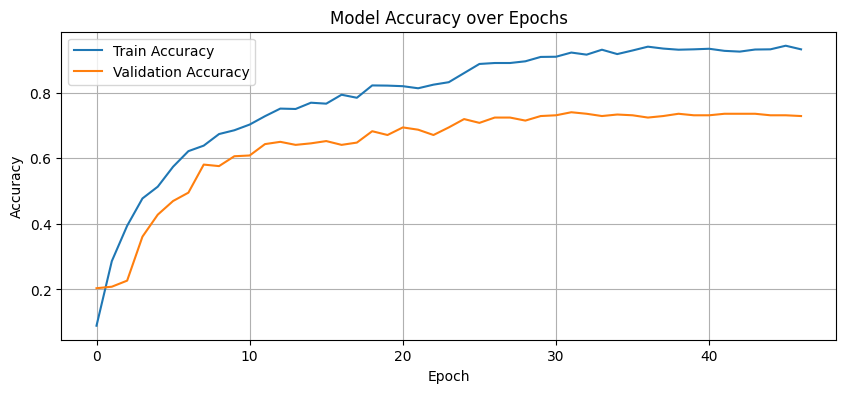

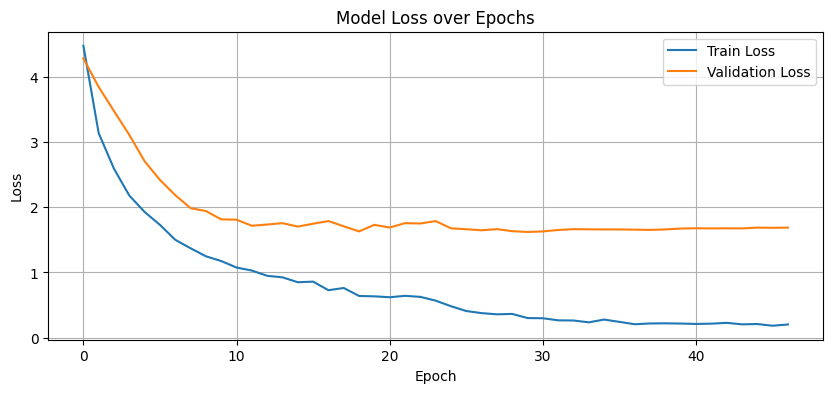

In [16]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy over Epochs")
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss over Epochs")
plt.legend()
plt.grid()
plt.show()


In [17]:
import random
import IPython.display as ipd
import librosa

# Pick a random test file
sample_idx = random.randint(0, len(X_test)-1)
sample_embedding = X_test[sample_idx].reshape(1, -1)
true_label_idx = y_test[sample_idx]

# Predict
pred_idx = np.argmax(model.predict(sample_embedding))
pred_label = le.inverse_transform([pred_idx])[0]
true_label = le.inverse_transform([true_label_idx])[0]

print(f"✅ Predicted Bird Class: {pred_label}")
print(f"🎯 True Bird Class: {true_label}")

# Play audio (optional: store the file path somewhere to retrieve)
# If you saved file_paths_test, you could do:
# ipd.Audio(file_paths_test[sample_idx])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
✅ Predicted Bird Class: Tawny-breasted Tinamou_sound
🎯 True Bird Class: Tawny-breasted Tinamou_sound
